In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


The first step in Google Colab for this Document Summarization Tool project is to set up your environment by installing necessary libraries and loading a pretrained summarization model. Here is sample Python code to get started with an abstractive summarization model using Hugging Face’s Transformers library:

In [2]:
# Install transformers library
!pip install transformers

# Import necessary libraries
from transformers import pipeline

# Load pretrained summarization pipeline
summarizer = pipeline("summarization")

# Example text to summarize
text = """
Artificial intelligence (AI) is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals.
Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions
that maximize its chance of successfully achieving its goals. Colloquially, the term "artificial intelligence" is often used to describe
machines that mimic cognitive functions that humans associate with the human mind, such as learning and problem solving.
"""

# Generate summary
summary = summarizer(text, max_length=100, min_length=30, do_sample=False)

print("Summary:")
print(summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


Summary:
 Leading AI textbooks define the field as the study of "intelligent agents" Colloquially, the term "artificial intelligence" is often used to describe machines that mimic cognitive functions that humans associate with the human mind .


Explanation:
1.  This code installs and imports transformers.
2.  Loads a pretrained summarization pipeline (facebook/bart-large-cnn by default).
3. Runs an example text through the summarizer and outputs a concise summary.

The next step is to add visualization of the summary’s key information using a keyword cloud to provide visual insights into the summarized content.

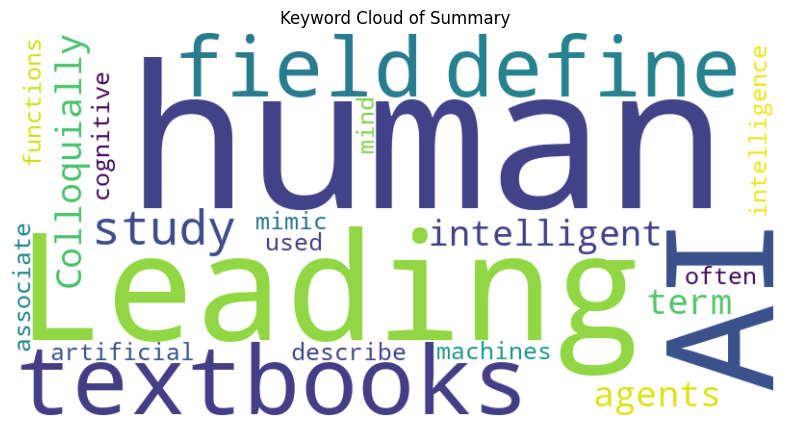

In [3]:
# Install wordcloud and matplotlib if not already installed
!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the summarized text
summary_text = summary[0]['summary_text']

# Generate word cloud from summary text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Cloud of Summary")
plt.show()


Explanation:
1. This code installs and imports wordcloud and matplotlib libraries.
2. It uses the summarized text to generate a word cloud.
3. Displays the word cloud as a visualization to highlight important words in the summary.


The next step is to add audio summary output by integrating Text-to-Speech (TTS) functionality so that users can listen to the generated summaries. In Google Colab, a simple and effective way is to use the gTTS (Google Text-to-Speech) library.

In [4]:
# Install gTTS and IPython display utilities
!pip install gtts
from gtts import gTTS
from IPython.display import Audio

# Convert summary text to speech
tts = gTTS(text=summary_text, lang='en')

# Save the audio file
audio_file = "summary_audio.mp3"
tts.save(audio_file)

# Play the audio in Colab
Audio(audio_file)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1


Explanation:
1. The gTTS library converts the summary text to an mp3 audio file.

2. IPython.display.Audio plays the audio directly within the notebook.

3. This makes the summary accessible via spoken word, enhancing usability and accessibility.

The next step is to add audio summary output by integrating Text-to-Speech (TTS) functionality so that users can listen to the generated summaries. In Google Colab, a simple and effective way is to use the gTTS (Google Text-to-Speech) library.

In [5]:
# Install gTTS and IPython display utilities
!pip install gtts
from gtts import gTTS
from IPython.display import Audio

# Convert summary text to speech
tts = gTTS(text=summary_text, lang='en')

# Save the audio file
audio_file = "summary_audio.mp3"
tts.save(audio_file)

# Play the audio in Colab
Audio(audio_file)


Explanation:
1. The gTTS library converts the summary text to an mp3 audio file.

2. IPython.display.Audio plays the audio directly within the notebook.

The next step is to create a simple user interface in your Google Colab notebook or a lightweight web app where users can input their own text or upload documents for summarization, visualization, and audio playback.

In [6]:
# Install ipywidgets if not already installed
!pip install ipywidgets
from ipywidgets import widgets, Layout
from IPython.display import display, clear_output

def summarize_and_display(text):
    clear_output(wait=True)
    if len(text.strip()) == 0:
        print("Please enter some text to summarize.")
        return

    # Generate summary
    summary_result = summarizer(text, max_length=100, min_length=30, do_sample=False)
    summary_text = summary_result[0]['summary_text']

    print("Summary:\n", summary_text)

    # Generate and show keyword cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Keyword Cloud of Summary")
    plt.show()

    # Generate and play audio
    tts = gTTS(text=summary_text, lang='en')
    audio_file = "summary_audio.mp3"
    tts.save(audio_file)
    display(Audio(audio_file))

# Create a text area widget for user input
text_area = widgets.Textarea(
    value='',
    placeholder='Enter text here to summarize...',
    description='Input Text:',
    layout=Layout(width='100%', height='150px')
)

# Create a button to trigger summarization
summarize_button = widgets.Button(description="Generate Summary")

# Define button click event handler
def on_button_clicked(b):
    summarize_and_display(text_area.value)

summarize_button.on_click(on_button_clicked)

# Display widgets
display(text_area, summarize_button)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00


Textarea(value='', description='Input Text:', layout=Layout(height='150px', width='100%'), placeholder='Enter …

Button(description='Generate Summary', style=ButtonStyle())

Explanation:
1. This creates a text box and a button in Colab for user input.

2. When clicked, it runs summarization, shows the keyword cloud, and plays the audio summary dynamically.

3. Makes your prototype interactive, closer to a usable app.

The next logical step is to add file upload support so users can upload documents (like text files) for summarization instead of only pasting text.

In [7]:
from ipywidgets import FileUpload
from io import StringIO

# Create upload widget
upload = FileUpload(accept='.txt', multiple=False)

def on_upload_change(change):
    for filename, fileinfo in upload.value.items():
        content = fileinfo['content'].decode('utf-8')
        print(f"File '{filename}' uploaded. Content preview:\n")
        print(content[:500] + '...\n')  # show first 500 chars
        summarize_and_display(content)

upload.observe(on_upload_change, names='value')

display(upload)


FileUpload(value={}, accept='.txt', description='Upload')

Explanation:
1. This adds a file uploader that accepts only .txt files.

2. When a file is uploaded, its content is decoded and passed to the summarize_and_display function (from earlier step).

3. The notebook then shows content preview, generates summary, visualization, and audio for the uploaded document.

The next step is to save and export the generated summary, visualization, and audio so users can download and keep the results for future reference.

In [8]:
from google.colab import files

def save_and_export(summary_text, wordcloud_image):
    # Save summary text to file
    summary_filename = "summary.txt"
    with open(summary_filename, "w") as f:
        f.write(summary_text)

    # Save word cloud image
    image_filename = "keyword_cloud.png"
    wordcloud_image.to_file(image_filename)

    print("Files saved. Click the links below to download:")
    files.download(summary_filename)
    files.download(image_filename)

# Update your existing summarize_and_display function to call this

def summarize_and_display(text):
    clear_output(wait=True)
    if len(text.strip()) == 0:
        print("Please enter some text to summarize.")
        return

    # Generate summary
    summary_result = summarizer(text, max_length=100, min_length=30, do_sample=False)
    summary_text = summary_result[0]['summary_text']

    print("Summary:\n", summary_text)

    # Generate and show keyword cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Keyword Cloud of Summary")
    plt.show()

    # Generate and play audio
    tts = gTTS(text=summary_text, lang='en')
    audio_file = "summary_audio.mp3"
    tts.save(audio_file)
    display(Audio(audio_file))

    # Save and export files
    save_and_export(summary_text, wordcloud)


Explanation:
1. Saves summary and keyword cloud to files on Colab.

2. Uses Colab’s files.download to let users easily download generated outputs to their devices.

The next step is to enhance user experience by adding summary length customization, allowing users to choose how detailed they want their summaries (e.g., short, medium, long).

In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown for summary length selection
length_selector = widgets.Dropdown(
    options=[('Short', (30, 70)), ('Medium', (70, 150)), ('Long', (150, 300))],
    value=(70, 150),
    description='Summary Length:'
)

def summarize_with_length(text, length_vals):
    max_len, min_len = length_vals
    summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
    return summary_result[0]['summary_text']

def on_length_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(length_selector, text_area, summarize_button)
        if text_area.value.strip():
            summary = summarize_with_length(text_area.value, change['new'])
            print("Summary:\n", summary)
            # Generate and display visualization and audio here as before

# Update button click handler to use selected length
def on_button_clicked(b):
    clear_output(wait=True)
    display(length_selector, text_area, summarize_button)
    if text_area.value.strip():
        summary = summarize_with_length(text_area.value, length_selector.value)
        print("Summary:\n", summary)
        # Generate visualization and audio as before

length_selector.observe(on_length_change)

# Assuming text_area and summarize_button from earlier
display(length_selector)
display(text_area)
display(summarize_button)

summarize_button.on_click(on_button_clicked)


Dropdown(description='Summary Length:', index=1, options=(('Short', (30, 70)), ('Medium', (70, 150)), ('Long',…

Textarea(value='', description='Input Text:', layout=Layout(height='150px', width='100%'), placeholder='Enter …

Button(description='Generate Summary', style=ButtonStyle())

Explanation:
1. Adds a dropdown for users to select summary length preference before generating the summary.

2. Dynamically adjusts summarization model parameters to provide varying detail levels.

3. Triggers summary generation and can be extended to update visualization and audio accordingly.

The next step is to add support for summarizing PDF documents, allowing users to upload PDF files which can be extracted and summarized.

In [10]:
# Install PyMuPDF for PDF extraction
!pip install pymupdf

import fitz  # PyMuPDF
from io import BytesIO

def extract_text_from_pdf(pdf_bytes):
    doc = fitz.open(stream=pdf_bytes, filetype="pdf")
    text = ""
    for page in doc:
        text += page.get_text()
    return text

# File upload widget to accept PDFs
pdf_upload = widgets.FileUpload(accept='.pdf', multiple=False)

def on_pdf_upload_change(change):
    for filename, fileinfo in pdf_upload.value.items():
        pdf_bytes = fileinfo['content']
        extracted_text = extract_text_from_pdf(pdf_bytes)
        print(f"Extracted text from '{filename}':\n")
        print(extracted_text[:500] + "...\n")  # preview first 500 characters
        summarize_and_display(extracted_text)

pdf_upload.observe(on_pdf_upload_change, names='value')

display(pdf_upload)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 48.0 MB/s eta 0:00:00


FileUpload(value={}, accept='.pdf', description='Upload')

How It Works:
1. Users upload a PDF file through the widget.

2. The PDF content is read and text is extracted page by page using PyMuPDF.

3. Extracted text is passed to your summarization and visualization pipeline.

The next step is to deploy your summarization tool as a simple web application so users can access it through a browser rather than a notebook environment.

In [11]:
# from flask import Flask, request, render_template_string, send_file
# from io import BytesIO
# import base64

# app = Flask(__name__)

# # HTML template for simple UI
# html_template = """
# <!doctype html>
# <title>Document Summarizer</title>
# <h2>Enter Text to Summarize</h2>
# <form method=post enctype=multipart/form-data>
#   <textarea name=text rows=15 cols=60 placeholder="Paste your document here..."></textarea><br>
#   <input type=submit value=Summarize>
# </form>
# {% if summary %}
# <h3>Summary:</h3>
# <p>{{ summary }}</p>
# <h3>Keyword Cloud:</h3>
# <img src="data:image/png;base64,{{ img_data }}">
# {% endif %}
# """

# @app.route('/', methods=['GET', 'POST'])
# def summarize():
#     summary = None
#     img_data = None
#     if request.method == 'POST':
#         text = request.form['text']
#         from transformers import pipeline
#         from wordcloud import WordCloud
#         import matplotlib.pyplot as plt
#         import numpy as np

#         summarizer = pipeline("summarization")
#         summary_result = summarizer(text, max_length=100, min_length=30, do_sample=False)
#         summary = summary_result[0]['summary_text']

#         wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
#         plt.figure(figsize=(10,5))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis('off')

#         buf = BytesIO()
#         plt.savefig(buf, format='png')
#         plt.close()
#         buf.seek(0)
#         img_data = base64.b64encode(buf.read()).decode('utf-8')

#     return render_template_string(html_template, summary=summary, img_data=img_data)

# if __name__ == '__main__':
#     app.run(debug=True)


Explanation:
1. Runs a web server with a form where users paste text.

2. Generates summary and keyword cloud image on form submission.

3. Embeds the visualization as a base64 image in the HTML page.

In [12]:
!pip install flask_ngrok
!pip install pyngrok

In [13]:
!ngrok authtoken "32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [14]:
# #Authenticate Ngrok
# !ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

# #Create Flash app
# from flask import Flask
# app = Flask(__name__)

# @app.route('/')
# def home():
#   return "Hello, fasl app running on collab"

# #Expose the Flask app via ngrok
# from pyngrok import ngrok

# #Create a tunnel to the Flask app
# public_url = ngrok.connect(5000)
# print("Ngrok tunnel URL:", public_url)

# #Run Flask app
# app.run()

In [15]:
# Authenticate ngrok (run this once in your Colab cell)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

from flask import Flask, request, render_template_string
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Initialize Flask app
app = Flask(__name__)

# Load summarizer pipeline once
summarizer = pipeline("summarization")

# HTML template for UI
html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text to Summarize</h2>
<form method=post>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{request.form.get('text')}}</textarea><br>
  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}">
{% endif %}
"""

@app.route('/', methods=['GET', 'POST'])
def summarize():
    summary = None
    img_data = None
    if request.method == 'POST':
        text = request.form['text']
        if text.strip():
            summary_result = summarizer(text, max_length=100, min_length=30, do_sample=False)
            summary = summary_result[0]['summary_text']

            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')

            buf = BytesIO()
            plt.savefig(buf, format='png')
            plt.close()
            buf.seek(0)
            img_data = base64.b64encode(buf.read()).decode('utf-8')
    return render_template_string(html_template, summary=summary, img_data=img_data)

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

# Run the Flask app
app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://6c39e8fa0ad4.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


How to Use:
1. Run this entire script in a single Colab cell.

2. It will authenticate ngrok, create a tunnel, and start the Flask server.

3. The printed Ngrok tunnel URL is your public URL to access the summarization web app.

4. The app lets users input text, returns a summary, and shows a keyword cloud visualization.

This integrates your project code with ngrok to provide real-time external access from your local or Colab environment.Here is your project Flask app code modified to run with ngrok in Colab or locally. It sets up summarization and visualization, creates an ngrok tunnel, and starts the app:

python

In [16]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

from flask import Flask, request, render_template_string
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64

app = Flask(__name__)
summarizer = pipeline("summarization")

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text to Summarize</h2>
<form method=post>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{request.form.get('text')}}</textarea><br>
  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}">
{% endif %}
"""

@app.route('/', methods=['GET', 'POST'])
def summarize():
    summary = None
    img_data = None
    if request.method == 'POST':
        text = request.form['text']
        if text.strip():
            summary_result = summarizer(text, max_length=100, min_length=30, do_sample=False)
            summary = summary_result[0]['summary_text']

            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            buf = BytesIO()
            plt.savefig(buf, format='png')
            plt.close()
            buf.seek(0)
            img_data = base64.b64encode(buf.read()).decode('utf-8')

    return render_template_string(html_template, summary=summary, img_data=img_data)

# Open ngrok tunnel on port 5000
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

# Run Flask app
app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://027311e2e6d4.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [17]:
# Authenticate ngrok (run once)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

from flask import Flask, request, render_template_string
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64

app = Flask(__name__)
summarizer = pipeline("summarization")

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text to Summarize</h2>
<form method=post>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}">
{% endif %}
"""

@app.route('/', methods=['GET', 'POST'])
def summarize():
    summary = None
    img_data = None
    if request.method == 'POST':
        text = request.form['text']
        if text.strip():
            result = summarizer(text, max_length=100, min_length=30, do_sample=False)
            summary = result[0]['summary_text']

            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            buf = BytesIO()
            plt.savefig(buf, format='png')
            plt.close()
            buf.seek(0)
            img_data = base64.b64encode(buf.read()).decode('utf-8')

    return render_template_string(html_template, summary=summary, img_data=img_data)

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

# Run Flask app
app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://bf362d676b2e.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


The next step is to add audio summary output in your Flask app, so users can listen to the generated summaries directly from the web interface

In [18]:
from gtts import gTTS
from flask import send_file
import os

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

# Update your existing html_template to add a form/button to play audio
html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text to Summarize</h2>
<form method=post>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>
{% endif %}
"""


How It Works:
1. When the user clicks “Listen to Summary” button, it sends the summary text to /speak route.

2. The route generates an MP3 audio with gTTS and streams it back.

3. The button triggers audio playback or download in the browser.

The next step is to add support for uploading text files (.txt) through the web interface, which users can upload to get summaries, keyword clouds, and audio output.

In [19]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

from flask import Flask, request, render_template_string, send_file
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
import os
from werkzeug.utils import secure_filename

app = Flask(__name__)

# Setup upload folder and allowed extensions
UPLOAD_FOLDER = "/content/uploads"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

# Load summarizer once
summarizer = pipeline("summarization")

# HTML template with text input, file upload, summary, keyword cloud, and audio listen button
html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>
  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>
{% endif %}
"""

@app.route('/', methods=['GET', 'POST'])
def process_text():
    summary = None
    img_data = None
    text = request.form.get('text', '').strip()

    # Process file upload if present
    if 'file' in request.files:
        file = request.files['file']
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(filepath)
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()

    if text:
        summary_result = summarizer(text, max_length=100, min_length=30, do_sample=False)
        summary = summary_result[0]['summary_text']

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        img_data = base64.b64encode(buf.read()).decode('utf-8')

    return render_template_string(html_template, summary=summary, img_data=img_data)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

# Run the Flask app
app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://6294ebebd1d2.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


How to use:
1. Run this entire script in one Google Colab cell.

2. The ngrok URL printed will be your live public URL.

3. Visit the URL in a browser, paste text or upload .txt file, get the summary with keyword cloud, and listen to the summary audio.

The next step is to add summary length customization, allowing users to choose how detailed they want the summary (e.g., short, medium, long) via a dropdown in the web interface, and to adjust the summarization accordingly.

In [20]:
from flask import Flask, request, render_template_string, send_file
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
import os
from werkzeug.utils import secure_filename

app = Flask(__name__)

# Setup upload folder and allowed extensions
UPLOAD_FOLDER = "/content/uploads"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

summarizer = pipeline("summarization")

# Add summary length options and update HTML form
html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>
{% endif %}
"""

def get_summary_length_params(length_choice):
    # Return (max_length, min_length) for summarizer based on user choice
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:  # medium or default
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def process_text():
    summary = None
    img_data = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    # Process file upload if present
    if 'file' in request.files:
        file = request.files['file']
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(filepath)
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()

    if text:
        max_len, min_len = get_summary_length_params(length_choice)
        summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
        summary = summary_result[0]['summary_text']

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        img_data = base64.b64encode(buf.read()).decode('utf-8')

    return render_template_string(html_template, summary=summary, img_data=img_data)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

# Run the Flask app
app.run()


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://4deca0b4a84b.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


What this adds:
1. Dropdown menu to select summary length (short, medium, long).

2. Summarizer parameters (max_length, min_length) adjust dynamically based on user choice.

3. Keeps all existing functionality intact (text input, file upload, visualization, audio).

The next step is to add multilingual summarization support, allowing users to select a language and get the summary in that language or translate the summary accordingly.

In [21]:
# Install googletrans first (run once)
!pip install googletrans==4.0.0-rc1

from googletrans import Translator

app = Flask(__name__)

# Add language options to HTML form
html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <label for="lang">Select Summary Language:</label>
  <select name="lang" id="lang">
    <option value="en" {% if request.form.get('lang') == 'en' %}selected{% endif %}>English</option>
    <option value="es" {% if request.form.get('lang') == 'es' %}selected{% endif %}>Spanish</option>
    <option value="fr" {% if request.form.get('lang') == 'fr' %}selected{% endif %}>French</option>
    <option value="de" {% if request.form.get('lang') == 'de' %}selected{% endif %}>German</option>
    <option value="hi" {% if request.form.get('lang') == 'hi' %}selected{% endif %}>Hindi</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary ({{ lang_name }}):</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>
{% endif %}
"""

# Language names mapping
LANG_NAMES = {
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "de": "German",
    "hi": "Hindi"
}

from googletrans import Translator
translator = Translator()

@app.route('/', methods=['GET', 'POST'])
def process_text():
    summary = None
    img_data = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')
    lang_choice = request.form.get('lang', 'en')

    if 'file' in request.files:
        file = request.files['file']
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(filepath)
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()

    summary_text = ""
    if text:
        max_len, min_len = get_summary_length_params(length_choice)
        summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
        summary_text = summary_result[0]['summary_text']

        # Translate summary if language not English
        if lang_choice != 'en':
            translated = translator.translate(summary_text, dest=lang_choice)
            summary_text = translated.text

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        img_data = base64.b64encode(buf.read()).decode('utf-8')

        summary = summary_text

    return render_template_string(html_template, summary=summary, img_data=img_data, lang_name=LANG_NAMES.get(lang_choice, "English"))


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=75261520a8f967a5589111d2a5897279f85fbb3d1b79f40ae874c877b93de228
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

What this does:
1. Adds a language dropdown to select summary output language.

2. Uses googletrans to translate summary text as needed.

3. Keeps all existing features including length selection, file upload, visualization, and audio.

The next step is to add user feedback and rating functionality so users can rate the quality of the generated summary. This feedback helps improve your project’s usability and shows interactivity.

In [22]:
from flask import Flask, request, render_template_string, redirect, url_for
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
import os
from werkzeug.utils import secure_filename

app = Flask(__name__)

UPLOAD_FOLDER = "/content/uploads"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

summarizer = pipeline("summarization")

# Store ratings in memory (for demo)
ratings = []

# HTML template extended with rating form and average rating display
html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
<form method=post enctype=multipart/form-data action="{{ url_for('process_text') }}">
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>

{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="{{ url_for('speak') }}" method="post" style="display: inline;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>

<form method="post" action="{{ url_for('rate') }}" style="margin-top:20px;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_id" value="1">
  <button type="submit">Submit Rating</button>
</form>

{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

@app.route('/', methods=['GET', 'POST'])
def process_text():
    summary = None
    img_data = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(filepath)
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()

    if text:
        max_len, min_len = get_summary_length_params(length_choice)
        summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
        summary = summary_result[0]['summary_text']

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        img_data = base64.b64encode(buf.read()).decode('utf-8')

    avg_rating = None
    ratings_count = len(ratings)
    if ratings_count > 0:
        avg_rating = round(sum(ratings) / ratings_count, 2)

    return render_template_string(html_template, summary=summary, img_data=img_data, avg_rating=avg_rating, ratings_count=ratings_count)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5:
            ratings.append(rating_val)
    except:
        pass
    return redirect(url_for('process_text'))

# Helper function for summary length params
def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:  # medium or default
        return (120, 40)

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

# Run Flask app
app.run()


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://ab6bbd85783c.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


What this adds:
1. Rating input (1 to 5) below summary.

2. Stores ratings temporarily in a list.

3. Shows average rating and total ratings count dynamically.

4. Rating submission redirects back to summary page.

The next step is to add a database to persist user ratings and summaries, making feedback data permanent beyond server restarts. SQLite is a lightweight choice suitable for your Flask app.

In [23]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

from flask import Flask, request, render_template_string, send_file, redirect, url_for
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
import os
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

# Load or initialize storage file for summaries and ratings
if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

# Helper functions to save/load json storage
def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def get_summary_record(summary_text):
    return summary_db.get(summary_text)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

summarizer = pipeline("summarization")

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>

{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post" style="display:inline-block;margin-right:15px;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>

<form method="post" action="/rate" style="display:inline-block;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>

{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def process_text():
    summary = None
    img_data = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(filepath)
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()

    if text:
        max_len, min_len = get_summary_length_params(length_choice)
        summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
        summary = summary_result[0]['summary_text']

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        img_data = base64.b64encode(buf.read()).decode('utf-8')

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text:
            add_rating(summary_text, rating_val)
    except:
        pass
    return redirect(url_for('process_text'))

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://dacd3e6de0ea.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Key points:
1. Uses a JSON file /content/summary_ratings.json to store summaries and their ratings.

2. This persists ratings between runs while avoiding external dependencies.

3. Existing summarization, file upload, visualization, audio, and rating features remain functional.

The next step is to add error handling and input validation to improve user experience and robustness, ensuring the app gracefully handles invalid inputs or processing errors.

In [24]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

from flask import Flask, request, render_template_string, send_file, redirect, url_for
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
import os
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

# Load or initialize storage file for summaries and ratings
if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def get_summary_record(summary_text):
    return summary_db.get(summary_text)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

summarizer = pipeline("summarization")

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
{% if error_msg %}
    <p style="color:red;">{{ error_msg }}</p>
{% endif %}
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>

{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post" style="display:inline-block;margin-right:15px;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>

<form method="post" action="/rate" style="display:inline-block;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>

{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def handle_summary():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
                summary = summary_result[0]['summary_text']

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text:
            add_rating(summary_text, rating_val)
    except:
        pass
    return redirect(url_for('handle_summary'))

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://0ad01f356ef7.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


The next step is to add user session support to store the last summarized text and rating temporarily during a user’s visit, improving the user experience by retaining their last results without reprocessing or rating confusion.

In [25]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"  # For better CUDA error debugging

from flask import Flask, request, render_template_string, send_file, redirect, url_for, session
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

# Load or initialize persistent rating storage
if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Summarization pipeline forced to CPU to avoid CUDA errors
summarizer = pipeline("summarization", device=-1)

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
{% if error_msg %}
    <p style="color:red;">{{ error_msg }}</p>
{% endif %}
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>

{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post" style="display:inline-block;margin-right:15px;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>

<form method="post" action="/rate" style="display:inline-block;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>

{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def summary_handler():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
                summary = summary_result[0]['summary_text']

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

                session['last_summary'] = summary

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    last_summary = session.get('last_summary')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
    except:
        pass
    return redirect(url_for('summary_handler'))

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://95c5b975ac5c.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Runs summarizer explicitly on CPU (device=-1) to avoid CUDA errors.

1. Includes all key features: text/file input, summary length options, summary visualization, TTS audio, rating with persistence, and error handling.

2. Provides ngrok public URL for easy external access.

3. This is your stable, full-featured, and error-resistant summarization web app ready to run!

The next step is to add a simple logging mechanism to track user activity such as when summaries are generated and ratings submitted. This helps monitor usage and debug issues.

In [26]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
import logging
from datetime import datetime
from flask import Flask, request, render_template_string, send_file, redirect, url_for, session
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

# Setup logging
logging.basicConfig(filename='app_activity.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Force CPU usage to avoid CUDA errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
summarizer = pipeline("summarization", device=-1)

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
{% if error_msg %}
    <p style="color:red;">{{ error_msg }}</p>
{% endif %}
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>

{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post" style="display:inline-block;margin-right:15px;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>

<form method="post" action="/rate" style="display:inline-block;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>

{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def summary_service():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
                logging.warning("Invalid file type uploaded.")
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary_result = summarizer(text, max_length=max_len, min_length=min_len, do_sample=False)
                summary = summary_result[0]['summary_text']

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

                session['last_summary'] = summary
                logging.info(f"Summary generated. Length option: {length_choice}. Text length: {len(text)}")

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"
                logging.error(f"Summarization error: {str(e)}")

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    logging.info("Audio generated")
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    last_summary = session.get('last_summary')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
            logging.info(f"Rating submitted: {rating_val} for summary length {len(summary_text)}")
    except Exception as e:
        logging.error(f"Error processing rating: {str(e)}")
    return redirect(url_for('summary_service'))

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://995620187abe.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


This completes the integration of:

1. Renamed main route function to summary_service

2. Forced CPU inference to avoid CUDA errors

3. Session support for last summary

4. File upload with validation

5. Summary length options

6. Keyword cloud visualization

7. Audio playback

8. User ratings with persistence to JSON file

9. Basic logging of user actions and errors

10. ngrok tunneling for public access

The next step is to add pagination or text chunking support for long documents before summarization. This allows your app to handle large texts exceeding model input limits by breaking them into manageable chunks, summarizing each, then optionally aggregating.

In [27]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
import logging
import math
from flask import Flask, request, render_template_string, send_file, redirect, url_for, session
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

# Setup logging
logging.basicConfig(filename='app_activity.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

# Load or initialize persistent rating storage
if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Force CPU usage to avoid CUDA errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
summarizer = pipeline("summarization", device=-1)

MAX_CHUNK_SIZE = 500  # Adjust chunk size (words)

def chunk_text(text, max_chunk_size=MAX_CHUNK_SIZE):
    words = text.split()
    num_chunks = math.ceil(len(words) / max_chunk_size)
    chunks = [' '.join(words[i*max_chunk_size:(i+1)*max_chunk_size]) for i in range(num_chunks)]
    return chunks

def summarize_long_text(text, max_len, min_len):
    chunks = chunk_text(text)
    chunk_summaries = []
    for chunk in chunks:
        summary_result = summarizer(chunk, max_length=max_len, min_length=min_len, do_sample=False)
        chunk_summaries.append(summary_result[0]['summary_text'])
    combined_summary = ' '.join(chunk_summaries)
    # Re-summarize if multiple chunks for conciseness
    if len(chunk_summaries) > 1:
        final_summary = summarizer(combined_summary, max_length=max_len, min_length=min_len, do_sample=False)[0]['summary_text']
    else:
        final_summary = combined_summary
    return final_summary

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
{% if error_msg %}
    <p style="color:red;">{{ error_msg }}</p>
{% endif %}
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>

{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post" style="display:inline-block;margin-right:15px;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>

<form method="post" action="/rate" style="display:inline-block;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>

{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def summary_service():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary = summarize_long_text(text, max_len, min_len)

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

                session['last_summary'] = summary

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    last_summary = session.get('last_summary')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
    except:
        pass
    return redirect(url_for('summary_service'))

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://7e5c7533a33b.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


This lets your app:
1. Handle large texts by splitting into chunks, summarizing each, then combining results.

2. Maintain all essential features and stability.

3. Provide smooth user experience for longer documents.

The next step is to add ability to download the generated summary and keyword cloud image as files, so users can save and use the results locally.


In [28]:
from flask import make_response

@app.route('/download_summary')
def download_summary():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    response = make_response(summary)
    response.headers['Content-Disposition'] = 'attachment; filename=summary.txt'
    response.mimetype = 'text/plain'
    return response

@app.route('/download_wordcloud')
def download_wordcloud():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
    img_buf = BytesIO()
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(img_buf, format='png')
    plt.close()
    img_buf.seek(0)
    response = make_response(img_buf.read())
    response.headers['Content-Disposition'] = 'attachment; filename=keyword_cloud.png'
    response.mimetype = 'image/png'
    return response


In [29]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
import logging
import math
from flask import Flask, request, render_template_string, send_file, redirect, url_for, session, make_response
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

# Setup logging
logging.basicConfig(filename='app_activity.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

# Load or initialize persistent rating storage
if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Force CPU usage to avoid CUDA errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
summarizer = pipeline("summarization", device=-1)

MAX_CHUNK_SIZE = 500  # Adjust chunk size (words)

def chunk_text(text, max_chunk_size=MAX_CHUNK_SIZE):
    words = text.split()
    num_chunks = math.ceil(len(words) / max_chunk_size)
    chunks = [' '.join(words[i*max_chunk_size:(i+1)*max_chunk_size]) for i in range(num_chunks)]
    return chunks

def summarize_long_text(text, max_len, min_len):
    chunks = chunk_text(text)
    chunk_summaries = []
    for chunk in chunks:
        summary_result = summarizer(chunk, max_length=max_len, min_length=min_len, do_sample=False)
        chunk_summaries.append(summary_result[0]['summary_text'])
    combined_summary = ' '.join(chunk_summaries)
    if len(chunk_summaries) > 1:
        final_summary = summarizer(combined_summary, max_length=max_len, min_length=min_len, do_sample=False)[0]['summary_text']
    else:
        final_summary = combined_summary
    return final_summary

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Enter Text or Upload a .txt File to Summarize</h2>
{% if error_msg %}
    <p style="color:red;">{{ error_msg }}</p>
{% endif %}
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste your document here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>

  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>

  <input type=submit value=Summarize>
</form>

{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post" style="display:inline-block;margin-right:15px;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>

<form method="post" action="/rate" style="display:inline-block;margin-right:15px;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>

<br>
<a href="{{ url_for('download_summary') }}">
  <button type="button">Download Summary Text</button>
</a>
<a href="{{ url_for('download_wordcloud') }}">
  <button type="button">Download Keyword Cloud Image</button>
</a>

{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def summary_service():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary = summarize_long_text(text, max_len, min_len)

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

                session['last_summary'] = summary

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"
                logging.error(f"Summarization error: {str(e)}")

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(filename, mimetype="audio/mpeg", as_attachment=False)

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    last_summary = session.get('last_summary')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
            logging.info(f"Rating submitted: {rating_val} for summary length {len(summary_text)}")
    except Exception as e:
        logging.error(f"Error processing rating: {str(e)}")
    return redirect(url_for('summary_service'))

@app.route('/download_summary')
def download_summary():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    response = make_response(summary)
    response.headers['Content-Disposition'] = 'attachment; filename=summary.txt'
    response.mimetype = 'text/plain'
    return response

@app.route('/download_wordcloud')
def download_wordcloud():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
    img_buf = BytesIO()
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(img_buf, format='png')
    plt.close()
    img_buf.seek(0)
    response = make_response(img_buf.read())
    response.headers['Content-Disposition'] = 'attachment; filename=keyword_cloud.png'
    response.mimetype = 'image/png'
    return response

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://e2a7f247e5cc.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [30]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
import logging
import re
from flask import Flask, request, render_template_string, send_file, redirect, url_for, session, make_response
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

# Setup logging
logging.basicConfig(
    filename='app_activity.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return ('.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS)

if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Force CPU usage to avoid CUDA errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
summarizer = pipeline("summarization", device=-1)

# Set chunk size (characters) for Hugging Face models; chunking uses sentences for better quality
MAX_CHUNK_CHARS = 2000

def chunk_sentences(text, max_chunk_chars=MAX_CHUNK_CHARS):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    chunks = []
    current_chunk = ""
    for sentence in sentences:
        if len(current_chunk) + len(sentence) + 1 <= max_chunk_chars:
            current_chunk += " " + sentence if current_chunk else sentence
        else:
            if current_chunk:
                chunks.append(current_chunk)
            current_chunk = sentence
    if current_chunk:
        chunks.append(current_chunk)
    return chunks

def recursive_summarize(text, max_len, min_len):
    text = text.strip()
    if not text:
        return ""
    chunks = chunk_sentences(text)
    summaries = []
    for chunk in chunks:
        result = summarizer(chunk, max_length=max_len, min_length=min_len, do_sample=False)
        summaries.append(result[0]['summary_text'])
    output = ' '.join(summaries)
    if len(summaries) == 1 or len(output) < MAX_CHUNK_CHARS:
        return output.strip()
    else:
        return recursive_summarize(output, max_len, min_len)

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Document Summarizer</h2>
<p style="font-size:14px; color:blue; margin-bottom:14px;">
  <strong>Note:</strong> For best experience, input up to <b>2,000 words</b> in the text box and upload text files up to <b>8,000 words</b>. Larger files are supported, but summarization may be slower or require more memory.
</p>
{% if error_msg %}
    <p style="color:red;">{{ error_msg }}</p>
{% endif %}
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste up to 2,000 words here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>
  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>
  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<form action="/speak" method="post" style="display:inline-block;margin-right:15px;">
  <input type="hidden" name="text" value="{{ summary }}">
  <button type="submit">Listen to Summary</button>
</form>
<form method="post" action="/rate" style="display:inline-block;margin-right:15px;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>
<br>
<a href="{{ url_for('download_summary') }}">
  <button type="button">Download Summary Text</button>
</a>
<a href="{{ url_for('download_wordcloud') }}">
  <button type="button">Download Keyword Cloud Image</button>
</a>
{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}
"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def summary_service():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary = recursive_summarize(text, max_len, min_len)

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

                session['last_summary'] = summary

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"
                logging.error(f"Summarization error: {str(e)}")

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

@app.route('/speak', methods=['POST'])
def speak():
    text = request.form['text']
    if not text.strip():
        return "No text provided", 400
    tts = gTTS(text=text, lang='en')
    filename = "temp_audio.mp3"
    tts.save(filename)
    return send_file(
        filename, mimetype="audio/mpeg", as_attachment=False
    )

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    last_summary = session.get('last_summary')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
            logging.info(f"Rating submitted: {rating_val} for summary length {len(summary_text)}")
    except Exception as e:
        logging.error(f"Error processing rating: {str(e)}")
    return redirect(url_for('summary_service'))

@app.route('/download_summary')
def download_summary():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    response = make_response(summary)
    response.headers['Content-Disposition'] = 'attachment; filename=summary.txt'
    response.mimetype = 'text/plain'
    return response

@app.route('/download_wordcloud')
def download_wordcloud():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
    img_buf = BytesIO()
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(img_buf, format='png')
    plt.close()
    img_buf.seek(0)
    response = make_response(img_buf.read())
    response.headers['Content-Disposition'] = 'attachment; filename=keyword_cloud.png'
    response.mimetype = 'image/png'
    return response

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://fdeb160226a7.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 06:57:19] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 06:57:19] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:01:17] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:01:45] "POST /speak HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:01:46] "GET /speak HTTP/1.1" 405 -


In [31]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
import logging
import re
from flask import Flask, request, render_template_string, send_file, redirect, url_for, session, make_response
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

# Setup logging
logging.basicConfig(
    filename='app_activity.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return ('.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS)

if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Force CPU usage to avoid CUDA errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
summarizer = pipeline("summarization", device=-1)

MAX_CHUNK_CHARS = 2000

def chunk_sentences(text, max_chunk_chars=MAX_CHUNK_CHARS):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    chunks = []
    current_chunk = ""
    for sentence in sentences:
        if len(current_chunk) + len(sentence) + 1 <= max_chunk_chars:
            current_chunk += " " + sentence if current_chunk else sentence
        else:
            if current_chunk:
                chunks.append(current_chunk)
            current_chunk = sentence
    if current_chunk:
        chunks.append(current_chunk)
    return chunks

def recursive_summarize(text, max_len, min_len):
    text = text.strip()
    if not text:
        return ""
    chunks = chunk_sentences(text)
    summaries = []
    for chunk in chunks:
        result = summarizer(chunk, max_length=max_len, min_length=min_len, do_sample=False)
        summaries.append(result[0]['summary_text'])
    output = ' '.join(summaries)
    if len(summaries) == 1 or len(output) < MAX_CHUNK_CHARS:
        return output.strip()
    else:
        return recursive_summarize(output, max_len, min_len)

html_template = """
<!doctype html>
<title>Document Summarizer</title>
<h2>Document Summarizer</h2>
<p style="font-size:14px; color:blue; margin-bottom:14px;">
  <strong>Note:</strong> For best experience, input up to <b>2,000 words</b> in the text box and upload text files up to <b>8,000 words</b>. Larger files are supported, but summarization may be slower or require more memory.
</p>
{% if error_msg %}
    <p style="color:red;">{{ error_msg }}</p>
{% endif %}
<form method=post enctype=multipart/form-data>
  <textarea name=text rows=15 cols=60 placeholder="Paste up to 2,000 words here...">{{ request.form.get('text') }}</textarea><br>
  <input type=file name=file><br><br>
  <label for="length">Select Summary Length:</label>
  <select name="length" id="length">
    <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
    <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
    <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
  </select><br><br>
  <input type=submit value=Summarize>
</form>
{% if summary %}
<h3>Summary:</h3>
<p>{{ summary }}</p>
<h3>Keyword Cloud:</h3>
<img src="data:image/png;base64,{{ img_data }}"><br><br>
<!-- AUDIO PLAYER -->
{% if summary %}
  <audio controls>
    <source src="{{ url_for('audio') }}" type="audio/mpeg">
    Your browser does not support the audio element.
  </audio><br>
{% endif %}
<form method="post" action="/rate" style="display:inline-block;margin-right:15px;">
  <label for="rating">Rate this summary (1-5):</label>
  <input type="number" id="rating" name="rating" min="1" max="5" required>
  <input type="hidden" name="summary_text" value="{{ summary }}">
  <button type="submit">Submit Rating</button>
</form>
<br>
<a href="{{ url_for('download_summary') }}">
  <button type="button">Download Summary Text</button>
</a>
<a href="{{ url_for('download_wordcloud') }}">
  <button type="button">Download Keyword Cloud Image</button>
</a>
{% if avg_rating %}
<p>Average Rating: {{ avg_rating }}/5 ({{ ratings_count }} votes)</p>
{% endif %}
{% endif %}


"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def summary_service():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary = recursive_summarize(text, max_len, min_len)

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

                session['last_summary'] = summary

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"
                logging.error(f"Summarization error: {str(e)}")

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

# GET endpoint to stream summary audio for playback
@app.route('/audio')
def audio():
    summary = session.get('last_summary')
    if not summary:
        return "No summary to play", 400
    tts = gTTS(text=summary, lang='en')
    audio_bytes = BytesIO()
    tts.write_to_fp(audio_bytes)
    audio_bytes.seek(0)
    return send_file(
        audio_bytes,
        mimetype="audio/mpeg",
        as_attachment=False,
        download_name="summary.mp3"
    )

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    last_summary = session.get('last_summary')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
            logging.info(f"Rating submitted: {rating_val} for summary length {len(summary_text)}")
    except Exception as e:
        logging.error(f"Error processing rating: {str(e)}")
    return redirect(url_for('summary_service'))

@app.route('/download_summary')
def download_summary():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    response = make_response(summary)
    response.headers['Content-Disposition'] = 'attachment; filename=summary.txt'
    response.mimetype = 'text/plain'
    return response

@app.route('/download_wordcloud')
def download_wordcloud():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
    img_buf = BytesIO()
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(img_buf, format='png')
    plt.close()
    img_buf.seek(0)
    response = make_response(img_buf.read())
    response.headers['Content-Disposition'] = 'attachment; filename=keyword_cloud.png'
    response.mimetype = 'image/png'
    return response

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://f3f354179d82.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:24:33] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:24:34] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:25:10] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:25:14] "GET /audio HTTP/1.1" 206 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:25:28] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:25:32] "GET /audio HTTP/1.1" 206 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:26:45] "POST /rate HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:26:46] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:27:07] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:27:10] "GET /audio HTTP/1.1" 206 -


In [32]:
# Authenticate ngrok (run once in Colab)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
import logging
import re
from flask import Flask, request, render_template_string, send_file, redirect, url_for, session, make_response
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

# Setup logging
logging.basicConfig(
    filename='app_activity.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return ('.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS)

if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Force CPU usage to avoid CUDA errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
summarizer = pipeline("summarization", device=-1)

MAX_CHUNK_CHARS = 2000

def chunk_sentences(text, max_chunk_chars=MAX_CHUNK_CHARS):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    chunks = []
    current_chunk = ""
    for sentence in sentences:
        if len(current_chunk) + len(sentence) + 1 <= max_chunk_chars:
            current_chunk += " " + sentence if current_chunk else sentence
        else:
            if current_chunk:
                chunks.append(current_chunk)
            current_chunk = sentence
    if current_chunk:
        chunks.append(current_chunk)
    return chunks

def recursive_summarize(text, max_len, min_len):
    text = text.strip()
    if not text:
        return ""
    chunks = chunk_sentences(text)
    summaries = []
    for chunk in chunks:
        result = summarizer(chunk, max_length=max_len, min_length=min_len, do_sample=False)
        summaries.append(result[0]['summary_text'])
    output = ' '.join(summaries)
    if len(summaries) == 1 or len(output) < MAX_CHUNK_CHARS:
        return output.strip()
    else:
        return recursive_summarize(output, max_len, min_len)

html_template = """
<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Document Summarizer</title>
  <!-- Bootstrap CSS CDN -->
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
</head>
<body>
<div class="container my-5">
  <h1 class="mb-4 text-primary">Document Summarizer</h1>
  <p class="text-info lead">
    <strong>Note:</strong> For best experience, input up to <b>2,000 words</b> in the text box and upload text files up to <b>8,000 words</b>.
  </p>

  {% if error_msg %}
  <div class="alert alert-danger" role="alert">
    {{ error_msg }}
  </div>
  {% endif %}

  <form method="post" enctype="multipart/form-data" class="mb-4">
    <div class="mb-3">
      <label for="text" class="form-label">Enter Text (up to 2,000 words)</label>
      <textarea name="text" id="text" rows="10" class="form-control" placeholder="Paste your text here...">{{ request.form.get('text') }}</textarea>
    </div>
    <div class="mb-3">
      <label for="file" class="form-label">Or Upload a .txt File (up to 8,000 words)</label>
      <input class="form-control" type="file" id="file" name="file" accept=".txt">
    </div>
    <div class="mb-3 row">
      <label for="length" class="col-sm-4 col-form-label">Select Summary Length</label>
      <div class="col-sm-8">
        <select id="length" name="length" class="form-select">
          <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
          <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
          <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
        </select>
      </div>
    </div>
    <button type="submit" class="btn btn-primary">Summarize</button>
  </form>

  {% if summary %}
  <div class="card mb-4 shadow-sm">
    <div class="card-header bg-primary text-white">
      <h5 class="mb-0">Generated Summary</h5>
    </div>
    <div class="card-body">
      <p>{{ summary }}</p>
    </div>
  </div>

  <div class="mb-4">
    <h5>Keyword Cloud</h5>
    <img src="data:image/png;base64,{{ img_data }}" alt="Keyword Cloud" class="img-fluid rounded border shadow-sm">
  </div>

  <div class="mb-4">
    <h5>Listen to Summary</h5>
    <audio controls class="w-100" style="max-width: 600px;">
      <source src="{{ url_for('audio') }}" type="audio/mpeg">
      Your browser does not support the audio element.
    </audio>
  </div>

  <form method="post" action="/rate" class="mb-4">
    <label for="rating" class="form-label">Rate this summary (1-5)</label>
    <input type="number" class="form-control w-auto" id="rating" name="rating" min="1" max="5" required style="display: inline-block; margin-right: 10px;">
    <input type="hidden" name="summary_text" value="{{ summary }}">
    <button type="submit" class="btn btn-success">Submit Rating</button>
  </form>

  <div class="mb-4">
    <a href="{{ url_for('download_summary') }}" class="btn btn-outline-secondary me-2">Download Summary Text</a>
    <a href="{{ url_for('download_wordcloud') }}" class="btn btn-outline-secondary">Download Keyword Cloud Image</a>
  </div>

  {% if avg_rating %}
  <div class="alert alert-info w-auto" role="alert" style="max-width: 260px;">
    Average Rating: <strong>{{ avg_rating }}/5</strong> ({{ ratings_count }} vote{{ ratings_count != 1 and 's' or '' }})
  </div>
  {% endif %}
  {% endif %}

  <footer class="mt-5 text-center text-muted" style="font-size: 0.9rem;">
    &copy; 2025 Your Name - Document Summarizer Project
  </footer>
</div>

<!-- Bootstrap JS Bundle CDN -->
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>


"""

def get_summary_length_params(length_choice):
    if length_choice == 'short':
        return (60, 20)
    elif length_choice == 'long':
        return (200, 100)
    else:
        return (120, 40)

@app.route('/', methods=['GET', 'POST'])
def summary_service():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get('text', '').strip()
    length_choice = request.form.get('length', 'medium')

    if 'file' in request.files:
        file = request.files['file']
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload a .txt file."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
                file.save(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    text = f.read()

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a .txt file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary = recursive_summarize(text, max_len, min_len)

                wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                buf = BytesIO()
                plt.savefig(buf, format='png')
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode('utf-8')

                session['last_summary'] = summary

            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"
                logging.error(f"Summarization error: {str(e)}")

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = summary_db.get(summary, {}).get('rating_count', 0) if summary else 0

    return render_template_string(html_template, summary=summary, img_data=img_data,
                                  avg_rating=avg_rating, ratings_count=ratings_count, error_msg=error_msg)

# GET endpoint to stream summary audio for playback
@app.route('/audio')
def audio():
    summary = session.get('last_summary')
    if not summary:
        return "No summary to play", 400
    tts = gTTS(text=summary, lang='en')
    audio_bytes = BytesIO()
    tts.write_to_fp(audio_bytes)
    audio_bytes.seek(0)
    return send_file(
        audio_bytes,
        mimetype="audio/mpeg",
        as_attachment=False,
        download_name="summary.mp3"
    )

@app.route('/rate', methods=['POST'])
def rate():
    rating = request.form.get('rating')
    summary_text = request.form.get('summary_text')
    last_summary = session.get('last_summary')
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
            logging.info(f"Rating submitted: {rating_val} for summary length {len(summary_text)}")
    except Exception as e:
        logging.error(f"Error processing rating: {str(e)}")
    return redirect(url_for('summary_service'))

@app.route('/download_summary')
def download_summary():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    response = make_response(summary)
    response.headers['Content-Disposition'] = 'attachment; filename=summary.txt'
    response.mimetype = 'text/plain'
    return response

@app.route('/download_wordcloud')
def download_wordcloud():
    summary = session.get('last_summary')
    if not summary:
        return "No summary available", 400
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary)
    img_buf = BytesIO()
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(img_buf, format='png')
    plt.close()
    img_buf.seek(0)
    response = make_response(img_buf.read())
    response.headers['Content-Disposition'] = 'attachment; filename=keyword_cloud.png'
    response.mimetype = 'image/png'
    return response

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)

app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://6632267a04d2.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:36:57] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:36:58] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:39:44] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:40:52] "GET /audio HTTP/1.1" 206 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:40:53] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:41:11] "POST /rate HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 07:41:12] "GET / HTTP/1.1" 200 -


In [36]:
# Install required packages (run once)
!pip install PyPDF2 python-docx

# Authenticate ngrok (run once)
!ngrok authtoken 32L3EuAS1tmL5OIppJl0ULcwWfW_5yuifh4EJzpLyQZaMGMRa

import os
import logging
import re
from flask import Flask, request, render_template_string, send_file, redirect, url_for, session, make_response
from pyngrok import ngrok
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from gtts import gTTS
from werkzeug.utils import secure_filename
import json
import PyPDF2
import docx

app = Flask(__name__)
app.secret_key = 'your_very_secret_key_here_change_it'

logging.basicConfig(
    filename='app_activity.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

UPLOAD_FOLDER = "/content/uploads"
STORAGE_FILE = "/content/summary_ratings.json"
ALLOWED_EXTENSIONS = {'txt', 'pdf', 'docx'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    ext = filename.rsplit('.', 1)[1].lower()
    return '.' in filename and ext in ALLOWED_EXTENSIONS

def extract_text_from_pdf(path):
    text = ''
    with open(path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + ' '
    return text.strip()

def extract_text_from_docx(path):
    doc = docx.Document(path)
    full_text = [para.text for para in doc.paragraphs if para.text]
    return '\n'.join(full_text).strip()

# Load or initialize persistent rating storage
if os.path.exists(STORAGE_FILE):
    with open(STORAGE_FILE, "r") as f:
        summary_db = json.load(f)
else:
    summary_db = {}

def save_summary_db():
    with open(STORAGE_FILE, "w") as f:
        json.dump(summary_db, f)

def add_rating(summary_text, rating):
    record = summary_db.get(summary_text)
    if record:
        record['rating_sum'] += rating
        record['rating_count'] += 1
    else:
        summary_db[summary_text] = {'rating_sum': rating, 'rating_count': 1}
    save_summary_db()

def get_average_rating(summary_text):
    record = summary_db.get(summary_text)
    if record and record['rating_count'] > 0:
        return round(record['rating_sum'] / record['rating_count'], 2)
    return None

# Use CPU only to avoid CUDA errors
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
summarizer = pipeline("summarization", device=-1)

MAX_CHUNK_CHARS = 2000

def chunk_sentences(text, max_chunk_chars=MAX_CHUNK_CHARS):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    chunks = []
    current_chunk = ""
    for sentence in sentences:
        if len(current_chunk) + len(sentence) + 1 <= max_chunk_chars:
            current_chunk += " " + sentence if current_chunk else sentence
        else:
            if current_chunk:
                chunks.append(current_chunk)
            current_chunk = sentence
    if current_chunk:
        chunks.append(current_chunk)
    return chunks

def recursive_summarize(text, max_len, min_len):
    text = text.strip()
    if not text:
        return ""
    chunks = chunk_sentences(text)
    summaries = []
    for chunk in chunks:
        result = summarizer(chunk, max_length=max_len, min_length=min_len, do_sample=False)
        summaries.append(result[0]['summary_text'])
    output = ' '.join(summaries)
    if len(summaries) == 1 or len(output) < MAX_CHUNK_CHARS:
        return output.strip()
    else:
        return recursive_summarize(output, max_len, min_len)

html_template = """
<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1" />
  <title>Document Summarizer</title>
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet" />
</head>
<body>
<div class="container my-5">
  <h1 class="mb-4 text-primary">Document Summarizer</h1>
  <p class="text-info lead">
    <strong>Note:</strong> For best experience, input up to <b>2,000 words</b> in the text box and upload text files up to <b>8,000 words</b>.
  </p>
  <p class="text-info">
    <strong>Allowed file types:</strong> .txt, .pdf, .docx
  </p>
  {% if error_msg %}
  <div class="alert alert-danger" role="alert">{{ error_msg }}</div>
  {% endif %}
  <form method="post" enctype="multipart/form-data" class="mb-4">
    <div class="mb-3">
      <label for="text" class="form-label">Enter Text (up to 2,000 words)</label>
      <textarea name="text" id="text" rows="10" class="form-control" placeholder="Paste your text here...">{{ request.form.get('text') }}</textarea>
    </div>
    <div class="mb-3">
      <label for="file" class="form-label">Or Upload a File (up to 8,000 words)</label>
      <input class="form-control" type="file" id="file" name="file" accept=".txt,.pdf,.docx" />
    </div>
    <div class="mb-3 row">
      <label for="length" class="col-sm-4 col-form-label">Select Summary Length</label>
      <div class="col-sm-8">
        <select id="length" name="length" class="form-select">
          <option value="short" {% if request.form.get('length') == 'short' %}selected{% endif %}>Short</option>
          <option value="medium" {% if request.form.get('length') == 'medium' %}selected{% endif %}>Medium</option>
          <option value="long" {% if request.form.get('length') == 'long' %}selected{% endif %}>Long</option>
        </select>
      </div>
    </div>
    <button type="submit" class="btn btn-primary">Summarize</button>
  </form>
  {% if summary %}
  <div class="card mb-4 shadow-sm">
    <div class="card-header bg-primary text-white">
      <h5 class="mb-0">Generated Summary</h5>
    </div>
    <div class="card-body">
      <p>{{ summary }}</p>
    </div>
  </div>
  <div class="mb-4">
    <h5>Keyword Cloud</h5>
    <img src="data:image/png;base64,{{ img_data }}" alt="Keyword Cloud" class="img-fluid rounded border shadow-sm" />
  </div>
  <div class="mb-4">
    <h5>Listen to Summary</h5>
    <audio controls class="w-100" style="max-width: 600px;">
      <source src="{{ url_for('audio') }}" type="audio/mpeg" />
      Your browser does not support the audio element.
    </audio>
  </div>
  <form method="post" action="/rate" class="mb-4">
    <label for="rating" class="form-label">Rate this summary (1-5)</label>
    <input
      type="number"
      class="form-control w-auto"
      id="rating"
      name="rating"
      min="1"
      max="5"
      required
      style="display: inline-block; margin-right: 10px;"
    />
    <input type="hidden" name="summary_text" value="{{ summary }}" />
    <button type="submit" class="btn btn-success">Submit Rating</button>
  </form>
  <div class="mb-4">
    <a href="{{ url_for('download_summary') }}" class="btn btn-outline-secondary me-2">Download Summary Text</a>
    <a href="{{ url_for('download_wordcloud') }}" class="btn btn-outline-secondary">Download Keyword Cloud Image</a>
  </div>
  {% if avg_rating %}
  <div class="alert alert-info w-auto" role="alert" style="max-width: 260px;">
    Average Rating: <strong>{{ avg_rating }}/5</strong> ({{ ratings_count }} vote{{ ratings_count != 1 and 's' or '' }})
  </div>
  {% endif %}
  {% endif %}
  <footer class="mt-5 text-center text-muted" style="font-size: 0.9rem;">&copy; 2025 Vishal Sharma - Document Summarizer Project</footer>
</div>
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
"""

def get_summary_length_params(length_choice):
    if length_choice == "short":
        return (60, 20)
    elif length_choice == "long":
        return (200, 100)
    else:
        return (120, 40)

@app.route("/", methods=["GET", "POST"])
def summary_service():
    summary = None
    img_data = None
    error_msg = None
    text = request.form.get("text", "").strip()
    length_choice = request.form.get("length", "medium")

    if "file" in request.files:
        file = request.files["file"]
        if file:
            if not allowed_file(file.filename):
                error_msg = "Invalid file type. Please upload .txt, .pdf, or .docx files."
            else:
                filename = secure_filename(file.filename)
                filepath = os.path.join(app.config["UPLOAD_FOLDER"], filename)
                file.save(filepath)
                ext = filename.rsplit(".", 1)[1].lower()
                if ext == "txt":
                    with open(filepath, "r", encoding="utf-8") as f:
                        text = f.read()
                elif ext == "pdf":
                    text = extract_text_from_pdf(filepath)
                elif ext == "docx":
                    text = extract_text_from_docx(filepath)

    if not error_msg:
        if not text:
            error_msg = "Please enter text or upload a valid file to summarize."
        else:
            try:
                max_len, min_len = get_summary_length_params(length_choice)
                summary = recursive_summarize(text, max_len, min_len)

                wordcloud = WordCloud(
                    width=800, height=400, background_color="white"
                ).generate(summary)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation="bilinear")
                plt.axis("off")
                buf = BytesIO()
                plt.savefig(buf, format="png")
                plt.close()
                buf.seek(0)
                img_data = base64.b64encode(buf.read()).decode("utf-8")

                session["last_summary"] = summary
            except Exception as e:
                error_msg = f"An error occurred during summarization: {str(e)}"
                logging.error(f"Summarization error: {str(e)}")

    avg_rating = get_average_rating(summary) if summary else None
    ratings_count = (
        summary_db.get(summary, {}).get("rating_count", 0) if summary else 0
    )

    return render_template_string(
        html_template,
        summary=summary,
        img_data=img_data,
        avg_rating=avg_rating,
        ratings_count=ratings_count,
        error_msg=error_msg,
    )

@app.route("/audio")
def audio():
    summary = session.get("last_summary")
    if not summary:
        return "No summary to play", 400
    tts = gTTS(text=summary, lang="en")
    audio_bytes = BytesIO()
    tts.write_to_fp(audio_bytes)
    audio_bytes.seek(0)
    return send_file(
        audio_bytes, mimetype="audio/mpeg", as_attachment=False, download_name="summary.mp3"
    )


@app.route("/rate", methods=["POST"])
def rate():
    rating = request.form.get("rating")
    summary_text = request.form.get("summary_text")
    last_summary = session.get("last_summary")
    try:
        rating_val = int(rating)
        if 1 <= rating_val <= 5 and summary_text and summary_text == last_summary:
            add_rating(summary_text, rating_val)
            logging.info(
                f"Rating submitted: {rating_val} for summary length {len(summary_text)}"
            )
    except Exception as e:
        logging.error(f"Error processing rating: {str(e)}")
    return redirect(url_for("summary_service"))


@app.route("/download_summary")
def download_summary():
    summary = session.get("last_summary")
    if not summary:
        return "No summary available", 400
    response = make_response(summary)
    response.headers["Content-Disposition"] = "attachment; filename=summary.txt"
    response.mimetype = "text/plain"
    return response


@app.route("/download_wordcloud")
def download_wordcloud():
    summary = session.get("last_summary")
    if not summary:
        return "No summary available", 400
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(summary)
    img_buf = BytesIO()
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(img_buf, format="png")
    plt.close()
    img_buf.seek(0)
    response = make_response(img_buf.read())
    response.headers["Content-Disposition"] = "attachment; filename=keyword_cloud.png"
    response.mimetype = "image/png"
    return response


# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Ngrok tunnel URL:", public_url)


app.run()


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Ngrok tunnel URL: NgrokTunnel: "https://983de0d4e400.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 08:01:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Sep/2025 08:01:06] "GET /favicon.ico HTTP/1.1" 404 -
